# Solidification simulations

We'll look at solidification in the Al-Zn system for an example Al-30Zn alloy.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, binplot, variables as v

Load the database file for this system

In [2]:
dbf = Database('alzn_mey.tdb')
comps = ['AL', 'ZN', 'VA']
phases = sorted(dbf.phases.keys())

CPU times: user 14 s, sys: 173 ms, total: 14.1 s
Wall time: 14.1 s


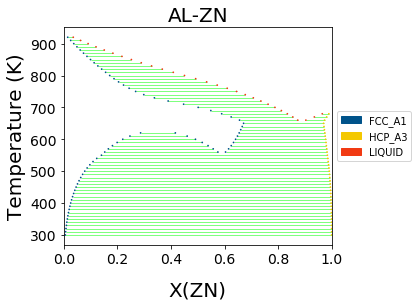

In [3]:
%%time
binplot(dbf, comps, phases, {v.P: 101325, v.N: 1, v.T: (300, 1000, 10), v.X('ZN'): (0, 1, 0.01)})

## Equilibrium Solidification

### Simulation

In [4]:
%%time

from scheil import simulate_equilibrium_solidification

initial_composition = {v.X('ZN'): 0.3}
start_temperature = 860

eq_sol_res = simulate_equilibrium_solidification(dbf, comps, phases, initial_composition, start_temperature, step_temperature=1.0)

CPU times: user 4.85 s, sys: 192 ms, total: 5.04 s
Wall time: 5.1 s


### Solidification path

CPU times: user 17 s, sys: 127 ms, total: 17.1 s
Wall time: 17.1 s


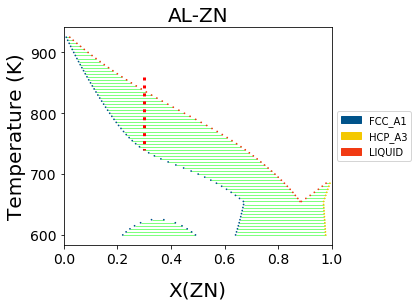

In [5]:
%%time
ax = binplot(dbf, comps, phases, {v.P: 101325, v.N: 1, v.T: (600, 1000, 5), v.X('ZN'): (0, 1, 0.01)})
ax.plot(np.ones(len(eq_sol_res.temperatures))*0.3, eq_sol_res.temperatures, linestyle=':', color='red', lw=3)

### Phase fractions

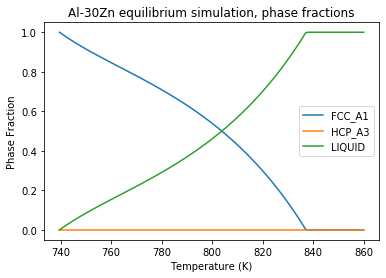

In [6]:
for phase_name, amounts in eq_sol_res.cum_phase_amounts.items():
    plt.plot(eq_sol_res.temperatures, amounts, label=phase_name)
plt.plot(eq_sol_res.temperatures, eq_sol_res.fraction_liquid, label='LIQUID')
plt.ylabel('Phase Fraction')
plt.xlabel('Temperature (K)')
plt.title('Al-30Zn equilibrium simulation, phase fractions')
plt.legend(loc='best')
plt.show()

## Scheil solidification

In [7]:
%%time

from scheil import simulate_scheil_solidification

initial_composition = {v.X('ZN'): 0.3}
start_temperature = 860

sol_res = simulate_scheil_solidification(dbf, comps, phases, initial_composition, start_temperature, step_temperature=1.0)

CPU times: user 14.6 s, sys: 462 ms, total: 15.1 s
Wall time: 15.1 s


### Solidification path

CPU times: user 17.4 s, sys: 125 ms, total: 17.6 s
Wall time: 17.6 s


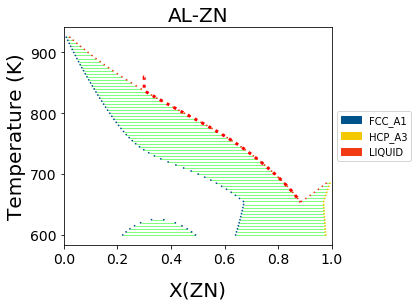

In [8]:
%%time
ax = binplot(dbf, comps, phases, {v.P: 101325, v.N: 1, v.T: (600, 1000, 5), v.X('ZN'): (0, 1, 0.01)})
ax.plot(sol_res.x_liquid['ZN'], sol_res.temperatures, linestyle=':', color='red', lw=3)

### Phase fractions

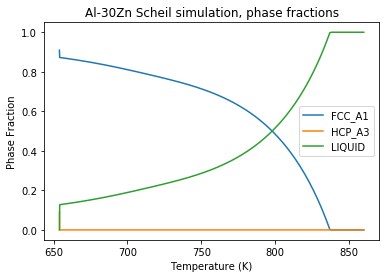

In [9]:
for phase_name, amounts in sol_res.cum_phase_amounts.items():
    plt.plot(sol_res.temperatures, amounts, label=phase_name)
plt.plot(sol_res.temperatures, sol_res.fraction_liquid, label='LIQUID')
plt.ylabel('Phase Fraction')
plt.xlabel('Temperature (K)')
plt.title('Al-30Zn Scheil simulation, phase fractions')
plt.legend(loc='best')
plt.show()

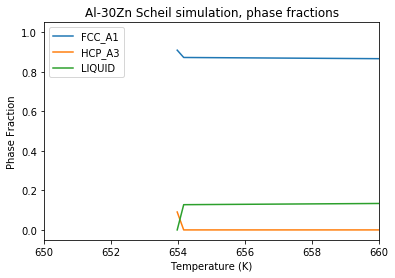

In [10]:
for phase_name, amounts in sol_res.cum_phase_amounts.items():
    plt.plot(sol_res.temperatures, amounts, label=phase_name)
plt.plot(sol_res.temperatures, sol_res.fraction_liquid, label='LIQUID')
plt.ylabel('Phase Fraction')
plt.xlabel('Temperature (K)')
plt.title('Al-30Zn Scheil simulation, phase fractions')
plt.legend(loc='best')
plt.xlim(650, 660)
plt.show()